In [1]:
import os
import pandas
import sys
import json
from io import StringIO, BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sciserver import config
from sciserver.authentication import Authentication
from sciserver.loginportal import LoginPortal
from sciserver.casjobs import CasJobs
from sciserver.skyquery import SkyQuery
from sciserver.scidrive import SciDrive
from sciserver.skyserver import SkyServer

# Define login Name and password before running these examples
#Authentication_loginName = 'testuser'
#Authentication_loginPassword = 'testpass'
token = config.get_token()

# Authentication:

In [2]:
# to get help on module or function
Authentication?
# or
help(Authentication)

Help on class Authentication in module sciserver.authentication:

class Authentication(__builtin__.object)
 |  This class handles all aspects of authenticating to SciServer
 |  
 |  Methods defined here:
 |  
 |  __init__(self, token=None)
 |  
 |  getKeystoneUserWithToken(self)
 |      Returns Keystone user info after login
 |      
 |      Returns the name and Keystone id of the user corresponding to the specified token.
 |      
 |      Parameters:
 |          token (str):
 |              Sciserver's authentication token for the user.
 |      
 |      Returns:
 |          an instance of the KeystoneUser object, which stores the name and id of the user.
 |      
 |      Raises:
 |          Exception: Throws an exception if the HTTP request to the Authentication URL returns an error.
 |      
 |      Example:
 |          >>> token = Authentication.getKeystoneUserWithToken(Authentication.getToken())
 |      
 |      See Also:
 |          Authentication.getToken, Authentication.login, A

In [3]:
# logging in and getting current token from different ways
auth = Authentication(token=token)
token1 = auth.login();
token2 = auth.getToken()
token3 = auth.token.value
print("token1=" + token1)
print("token2=" + token2)
print("token3=" + token3)

token1=c3260e7d4a274fd7ab5d721c67cad83f
token2=c3260e7d4a274fd7ab5d721c67cad83f
token3=c3260e7d4a274fd7ab5d721c67cad83f


In [4]:
# getting curent user info
user = auth.getKeystoneUserWithToken()
print("userName=" + user.userName)
print("id=" + user.userid)

userName=bac29
id=a78d02fb111f49418cf50006d3c0bc77


In [5]:
# reseting the current token to another value:
auth.setToken("myToken1")
token5 = auth.getToken()

print("token5=" + token5)

token5=myToken1


In [6]:
# logging-in again
token1 = auth.login();


# LoginPortal:

In [7]:
# logging in and getting current token from different ways
login = LoginPortal()
token1 = login.login();
token2 = login.getToken()
print("token1=" + token1)
print("token2=" + token2)

/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: SciServer.LoginPortal is deprecated. Use Authentication instead
  from ipykernel import kernelapp as app
/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using SciServer.LoginPortal.login is deprecated.Use auth.login instead.
  app.launch_new_instance()


token1=274c486930e64e579cba772074a0eb7d
token2=274c486930e64e579cba772074a0eb7d


/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using SciServer.LoginPortal.getToken is deprecated. Use auth.getToken instead.


In [8]:
# getting curent user info
user = login.getKeystoneUserWithToken()
print("userName=" + user.userName)
print("id=" + user.userid)#

/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using SciServer.LoginPortal.getKeystoneUserWithToken is deprecated. Use auth.getKeystoneUserWithToken instead.
  from ipykernel import kernelapp as app


userName=bac29
id=a78d02fb111f49418cf50006d3c0bc77


In [9]:
# logging-in again
token1 = login.login();

/Users/Brian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using SciServer.LoginPortal.login is deprecated.Use auth.login instead.
  from ipykernel import kernelapp as app


# CasJobs:

In [10]:
# Defining databse context and query, and other variables
CasJobs_TestDatabase = "MyDB"
CasJobs_TestQuery = "select 4 as Column1, 5 as Column2 "
CasJobs_TestTableName1 = "MyNewtable1"
CasJobs_TestTableName2 = "MyNewtable2"
CasJobs_TestTableCSV = u"Column1,Column2\n4,5\n"
CasJobs_TestFitsFile = "SciScriptTestFile.fits"
CasJobs_TestCSVFile = "SciScriptTestFile.csv"

In [11]:
# get user schema info
cas = CasJobs()
casJobsId = cas.getSchemaName()
print(casJobsId)

wsid_418343469


In [12]:
# get info about tables inside MyDB database context:
tables = cas.getTables(context="MyDB")
print(tables)

[{u'Date': 635427657366300000, u'Rows': 92307, u'Name': u'finaltest', u'Size': 4496}, {u'Date': 635427657371830000, u'Rows': 16279, u'Name': u'final_dr6testzcut1nolimits', u'Size': 1040}, {u'Date': 635427657372830000, u'Rows': 2026, u'Name': u'final_dr6testrpetrocut2', u'Size': 272}, {u'Date': 635427657373230000, u'Rows': 11954, u'Name': u'finalwholespectro_withprimtarget', u'Size': 2000}, {u'Date': 635427657374500000, u'Rows': 11954, u'Name': u'final_wholespectro_primtargetlist', u'Size': 976}, {u'Date': 635427657375470000, u'Rows': 154, u'Name': u'final_pairsprimtargetnames', u'Size': 32}, {u'Date': 635427657375700000, u'Rows': 2026, u'Name': u'final_dr6testrpetrocut2nolimits', u'Size': 272}, {u'Date': 635427657376100000, u'Rows': 613, u'Name': u'final_dr6testrpetrocut2nolimits_lowb', u'Size': 136}, {u'Date': 635427657376400000, u'Rows': 16279, u'Name': u'final_testwholespectrowithbratio', u'Size': 3472}, {u'Date': 635427657378430000, u'Rows': 7693, u'Name': u'final_wholespectro_good

In [13]:
# execute a quick SQL query:
df = cas.executeQuery(sql=CasJobs_TestQuery, context=CasJobs_TestDatabase, outformat="pandas")
print(df)

   Column1  Column2
0        4        5


In [14]:
# submit a job, which inserts the query results into a table in the MyDB database context. 
# Wait until the job is done and get its status.
jobId = cas.submitJob(sql=CasJobs_TestQuery + " into MyDB." + CasJobs_TestTableName1, context="MyDB")
jobDescription = cas.waitForJob(jobId=jobId, verbose=False)
print(jobId)
print(jobDescription)

30254094
{u'Status': 5, u'TimeStart': u'2017-08-30T11:33:44.243', u'Rows': 1, u'Target': u'MyDB', u'SendEmail': 0, u'Message': u'Query Complete', u'ModifiedQuery': u'select 4 as Column1, 5 as Column2  /*CASJOBS_INTO_TABLE:[sdss3q].mydb_418343469.webuser.MyNewtable1*/', u'Created_Table': u'MyNewtable1', u'TimeEnd': u'2017-08-30T11:33:44.543', u'JobID': 30254094, u'WebServicesID': 418343469, u'TimeSubmit': u'2017-08-30T11:33:38.44', u'Params': u'', u'HostIP': u'SQL001DBHost   ', u'Query': u'select 4 as Column1, 5 as Column2  into MyDB.MyNewtable1', u'Estimate': 500, u'OutputType': u'QUERY', u'TaskName': u'SciScript-Python.CasJobs.submitJob', u'OutputLoc': u'', u'AutoComplete': 0}


In [15]:
# drop or delete table in MyDB database context
df = cas.executeQuery(sql="DROP TABLE " + CasJobs_TestTableName1, context="MyDB", outformat="pandas")
print(df)

   Rows Affected
0              0


In [16]:
# get job status
jobId = cas.submitJob(sql=CasJobs_TestQuery, context=CasJobs_TestDatabase)
jobDescription = cas.getJobStatus(jobId)
print(jobId)
print(jobDescription)

30254096
{u'Status': 0, u'TimeStart': None, u'Rows': None, u'Target': u'MyDB', u'SendEmail': 0, u'Message': u'', u'ModifiedQuery': u'select 4 as Column1, 5 as Column2', u'Created_Table': u'', u'TimeEnd': None, u'JobID': 30254096, u'WebServicesID': 418343469, u'TimeSubmit': u'2017-08-30T11:33:48.213', u'Params': u'', u'HostIP': u'               ', u'Query': u'select 4 as Column1, 5 as Column2 ', u'Estimate': 500, u'OutputType': u'QUERY', u'TaskName': u'SciScript-Python.CasJobs.submitJob', u'OutputLoc': u'', u'AutoComplete': 0}


In [17]:
# cancel a job
jobId = cas.submitJob(sql=CasJobs_TestQuery, context=CasJobs_TestDatabase)
jobDescription = cas.cancelJob(jobId=jobId)
print(jobId)
print(jobDescription)

30254097
True


In [18]:
# execute a query and write a local Fits file containing the query results:
result = cas.writeFitsFileFromQuery(fileName=CasJobs_TestFitsFile, queryString=CasJobs_TestQuery, context="MyDB")
print(result)

True


In [19]:
# delete local FITS file just created:
os.remove(CasJobs_TestFitsFile)

In [20]:
# get a Pandas dataframe containing the results of a query
df = cas.getPandasDataFrameFromQuery(queryString=CasJobs_TestQuery, context=CasJobs_TestDatabase)
print(df)

   Column1  Column2
0        4        5


In [21]:
# get numpy array containing the results of a query
array = cas.getNumpyArrayFromQuery(queryString=CasJobs_TestQuery, context=CasJobs_TestDatabase)
print(array)

[[4 5]]


In [22]:
# uploads a Pandas dataframe into a Database table
df = pandas.read_csv(StringIO(CasJobs_TestTableCSV), index_col=None)
result = cas.uploadPandasDataFrameToTable(dataFrame=df, tableName=CasJobs_TestTableName2, context="MyDB")
table = cas.executeQuery(sql="select * from " + CasJobs_TestTableName2, context="MyDB", outformat="pandas")
print(result)
print(table)

True
   Column1  Column2
0        4        5


In [23]:
# drop or delete table just created:
result2 = cas.executeQuery(sql="DROP TABLE " + CasJobs_TestTableName2, context=CasJobs_TestDatabase, outformat="pandas")
print(result2)

   Rows Affected
0              0


In [24]:
# upload csv data string into a database table:
result3 = cas.uploadCSVDataToTable(csvData=CasJobs_TestTableCSV, tableName=CasJobs_TestTableName2, context="MyDB")
df2 = cas.executeQuery(sql="select * from " + CasJobs_TestTableName2, context="MyDB", outformat="pandas")
print(result3)
print(df2)

True
   Column1  Column2
0        4        5


In [25]:
# drop or delete table just created:
result4 = cas.executeQuery(sql="DROP TABLE " + CasJobs_TestTableName2, context="MyDB", outformat="pandas")
print(result4)

   Rows Affected
0              0


# SkyServer:

In [26]:
# defining sql query and SDSS data relelease:
SkyServer_TestQuery = "select top 1 specobjid, ra, dec from specobj order by specobjid"
SkyServer_DataRelease = "DR13"

In [27]:
# Exectute sql query
sky = SkyServer()
df = sky.sqlSearch(sql=SkyServer_TestQuery, dataRelease=SkyServer_DataRelease)
print(df)

            specobjid         ra       dec
0  299489677444933632  146.71421 -1.041304


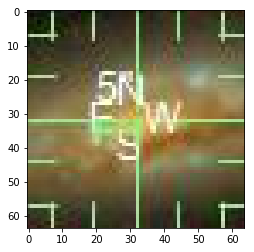

In [28]:
# get an image cutout
img = sky.getJpegImgCutout(ra=197.614455642896, dec=18.438168853724, width=2, height=2, scale=0.4, 
                                 dataRelease=SkyServer_DataRelease,opt="OG",
                                 query="SELECT TOP 100 p.objID, p.ra, p.dec, p.r FROM fGetObjFromRectEq(197.6,18.4,197.7,18.5) n, PhotoPrimary p WHERE n.objID=p.objID")
plt.imshow(img)

In [29]:
# do a radial search of objects:
df = sky.radialSearch(ra=258.25, dec=64.05, radius=0.1, dataRelease=SkyServer_DataRelease)
print(df)

                 objid   run  rerun  camcol  field  obj  type          ra  \
0  1237671939804561654  6162    301       3    133  246     3  258.250804   

         dec         u        g         r         i         z     Err_u  \
0  64.051445  23.33982  22.3194  21.41105  21.11971  20.84277  0.664019   

      Err_g    Err_r     Err_i     Err_z  
0  0.116986  0.07641  0.080523  0.238198  


In [30]:
# do rectangular search of objects:
df = sky.rectangularSearch(min_ra=258.3, max_ra=258.31, min_dec=64,max_dec=64.01, dataRelease=SkyServer_DataRelease)
print(df)

                 objid   run  rerun  camcol  field   obj  type          ra  \
0  1237671939804628290  6162    301       3    134  1346     6  258.304721   

         dec        u         g        r         i         z     Err_u  \
0  64.006203  25.0008  24.50057  22.4854  21.10345  20.14999  0.995208   

      Err_g     Err_r     Err_i     Err_z  
0  0.565456  0.166184  0.071836  0.124986  


In [31]:
# do an object search based on RA,Dec coordinates:
object = sky.objectSearch(ra=258.25, dec=64.05, dataRelease=SkyServer_DataRelease)
print(object)

[{u'Rows': [{u'specId': None, u'name': u'', u'apid': u'', u'objId': u'0x112d1812608500f6', u'specObjId': u'', u'id': 1237671939804561654}], u'TableName': u'objectInfo'}, {u'Rows': [{u'mjd': 53879, u'camcol': 3, u'run': 6162, u'specObjId': None, u'objid': 1237671939804561654, u'field': 133, u'otype': u'GALAXY', u'survey': u'', u'ra': 258.250803912329, u'clean': 0, u'rerun': 301, u'obj': 246, u'dec': 64.0514446092202, u'mode': 1}], u'TableName': u'MetaData'}, {u'Rows': [{u'parentID': 1237671939804561638, u'GalaxyZoo_Morph': u'-', u'nChild': 0, u'camcol': 3, u'mjdNum': 53879, u'otype': u'GALAXY', u'field': 133, u'ra': 258.250803912329, u'u': 23.33982, u'run': 6162, u'petrorad_r': u'     1.51 &plusmn      0.161', u'photoZ_KD': u'  0.369 &plusmn   0.1088', u'objId': u'0x112d1812608500f6', u'fieldId': u'0x112d181260850000', u'err_u': 0.6640186, u'Other observations': 1, u'z': 20.84277, u'g': 22.3194, u'err_r': 0.07641038, u'i': 21.11971, u'err_z': 0.2381976, u'err_g': 0.1169861, u'r': 21.411

# SciDrive:

In [32]:
# list content and metadata of top level directory in SciDrive
sci = SciDrive()
dirList = sci.directoryList("")
print(dirList)

{u'hash': u'1pZADUwZNZ/mULOXTUxixQ==', u'rev': 0, u'thumb_exists': False, u'bytes': 0, u'modified': u'Wed, 17 Feb 2016 15:10:02 -0500', u'items': 2, u'path': u'', u'is_dir': True, u'icon': u'folder_public', u'root': u'dropbox', u'contents': [{u'rev': 0, u'thumb_exists': False, u'bytes': 2636, u'modified': u'Fri, 26 Feb 2016 13:59:01 -0500', u'path': u'/first_container', u'is_dir': True, u'icon': u'folder_public', u'root': u'dropbox', u'size': u'2.6 KB'}, {u'rev': 0, u'thumb_exists': False, u'bytes': 58644, u'modified': u'Mon, 29 Feb 2016 14:31:13 -0500', u'path': u'/TestDir', u'is_dir': True, u'icon': u'folder_public', u'root': u'dropbox', u'size': u'57.3 KB'}], u'size': u'0 B'}


In [33]:
# define name of directory to be created in SciDrive:
SciDrive_Directory = "SciScriptPython"
# define name, path and content of a file to be first created and then uploaded into SciDrive:
SciDrive_FileName = "TestFile.csv"
SciDrive_FilePath = "./TestFile.csv"
SciDrive_FileContent = "Column1,Column2\n4.5,5.5\n"

In [34]:
# create a folder or container in SciDrive
responseCreate = sci.createContainer(SciDrive_Directory)
print(responseCreate)

True


In [35]:
# list content and metadata of directory in SciDrive
dirList = sci.directoryList(SciDrive_Directory)
print(dirList)

{u'hash': u'IImDMAKB8XDlLLKQkxF2RQ==', u'rev': 0, u'thumb_exists': False, u'bytes': 0, u'modified': u'Wed, 30 Aug 2017 11:34:01 -0400', u'items': 0, u'path': u'/SciScriptPython', u'is_dir': True, u'icon': u'folder_public', u'root': u'dropbox', u'contents': [], u'size': u'0 B'}


In [36]:
# get the public url to access the directory content in SciDrive
url = sci.publicUrl(SciDrive_Directory)
print(url)

https://www.scidrive.org/vospace-2.0/data/2c05c873-61dc-47cd-b695-d9b7fc57f220


In [37]:
# Delete folder or container in SciDrive:
responseDelete = sci.delete(SciDrive_Directory)
print(responseDelete)

True


In [38]:
# create a local file:
file = open(SciDrive_FileName, "w")
file.write(SciDrive_FileContent)
file.close()

In [39]:
# uploading a file to SciDrive:
responseUpload = sci.upload(path=SciDrive_Directory + "/" + SciDrive_FileName, localFilePath=SciDrive_FilePath)
print(responseUpload)

{u'rev': 1, u'thumb_exists': False, u'bytes': 24, u'modified': u'Wed, 30 Aug 2017 11:34:04 -0400', u'path': u'/SciScriptPython/TestFile.csv', u'is_dir': False, u'icon': u'file', u'root': u'dropbox', u'mime_type': u'application/file', u'size': u'24 B'}


In [ ]:
# download file:
stringio = sci.download(path=SciDrive_Directory + "/" + SciDrive_FileName, outformat="StringIO")
fileContent = stringio.read()
print(fileContent)

Column1,Column2
4.5,5.5



In [ ]:
# upload string data:
responseUpload = sci.upload(path=SciDrive_Directory + "/" + SciDrive_FileName, data=SciDrive_FileContent)
fileContent = sci.download(path=SciDrive_Directory + "/" + SciDrive_FileName, outformat="text")
print(fileContent)

In [ ]:
# delete folder in SciDrive:
responseDelete = sci.delete(SciDrive_Directory)
print(responseDelete)

In [ ]:
# delete local file:
os.remove(SciDrive_FilePath)

# SkyQuery:

In [ ]:
# list all databses or datasets available
skyquery = SkyQuery()
datasets = skyquery.listAllDatasets()
print(datasets)

In [ ]:
# get info about the user's personal database or dataset
info = skyquery.getDatasetInfo("MyDB")
print(info)

In [ ]:
# list tables inside dataset
tables = skyquery.listDatasetTables("MyDB")
print(tables)

In [ ]:
# list available job queues
queueList = skyquery.listQueues()
print(queueList)

In [ ]:
# list available job queues and related info
quick = skyquery.getQueueInfo('quick')
long= skyquery.getQueueInfo('long')
print(quick)
print(long)

In [ ]:
# Define query
SkyQuery_Query = "select 4.5 as Column1, 5.5 as Column2"

In [ ]:
# submit a query as a job
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="quick")
print(jobId)

In [ ]:
# get status of a submitted job
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="quick")
jobDescription = skyquery.getJobStatus(jobId=jobId)
print(jobDescription)

In [ ]:
# wait for a job to be finished and then get the status
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="quick")
jobDescription = skyquery.waitForJob(jobId=jobId, verbose=True)
print("jobDescription=")
print(jobDescription)

In [ ]:
# cancel a job that is running, and then get its status
jobId = skyquery.submitJob(query=SkyQuery_Query, queue="long")
isCanceled = skyquery.cancelJob(jobId)
print(isCanceled)
print("job status:")
print(skyquery.getJobStatus(jobId=jobId))

In [ ]:
# get list of jobs
quickJobsList = skyquery.listJobs('quick')
longJobsList = skyquery.listJobs('long')
print(quickJobsList)
print(longJobsList)

In [ ]:
# define csv table to be uploaded to into MyDB in SkyQuery
SkyQuery_TestTableName = "TestTable_SciScript_R"
SkyQuery_TestTableCSV = u"Column1,Column2\n4.5,5.5\n"

In [ ]:
# uploading the csv table:
result = skyquery.uploadTable(uploadData=SkyQuery_TestTableCSV, tableName=SkyQuery_TestTableName, datasetName="MyDB", informat="csv")
print(result)

In [ ]:
# downloading table:
table = skyquery.getTable(tableName=SkyQuery_TestTableName, datasetName="MyDB", top=10)
print(table)

In [ ]:
# list tables inside dataset
tables = skyquery.listDatasetTables("MyDB")
print(tables)

In [ ]:
# get dataset table info:
info = skyquery.getTableInfo(tableName="webuser." + SkyQuery_TestTableName, datasetName="MyDB")
print(info)

In [ ]:
# get dataset table columns info
columns = skyquery.listTableColumns(tableName="webuser." + SkyQuery_TestTableName, datasetName="MyDB")
print(columns)

In [ ]:
# drop (or delete) table from dataset.
result = skyquery.dropTable(tableName=SkyQuery_TestTableName, datasetName="MyDB");
print(result)